# Graded Challenge 3

#### About the dataset

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


#### Objective
Graded Challenge 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:

- Mampu memahami konsep Classification dengan Ensemble Model
- Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
- Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

### Import Library

In [1]:
# for basic mathematics operation 
import numpy as np

# for dataframe manipulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Predicting mortality caused by Heart Failure
### Data Loading

In [2]:
# Load the dataset
df = pd.read_csv("heart_failure_clinical_records_dataset 2.csv")

In [3]:
# Look at the first 5 rows the dataset
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Showing info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# Look at the shape of the dataset (# rows, # columns)
print("Shape of the dataset :", df.shape)

Shape of the dataset : (299, 13)


### Data Cleaning

##### Missing Values

In [6]:
# Showing Missing Value
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak adanya missing value pada dataset

##### Duplicate Data

In [7]:
# Shows the duplicated data
df.duplicated().sum()

0

Tidak terdapat adanya duplicated data pada dataset

##### Change Column name

In [8]:
# Changing column name
df.rename({'DEATH_EVENT' : 'death'}, axis=1,inplace=True)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


##### Numerical and Categorical

In [9]:
# Pisahkan data numerical dan categorical

num = df.drop(columns=['anaemia','diabetes','high_blood_pressure','sex','smoking','death'])
cat = df[['anaemia','diabetes','high_blood_pressure','sex','smoking']]

### Exploratory Data Analysis

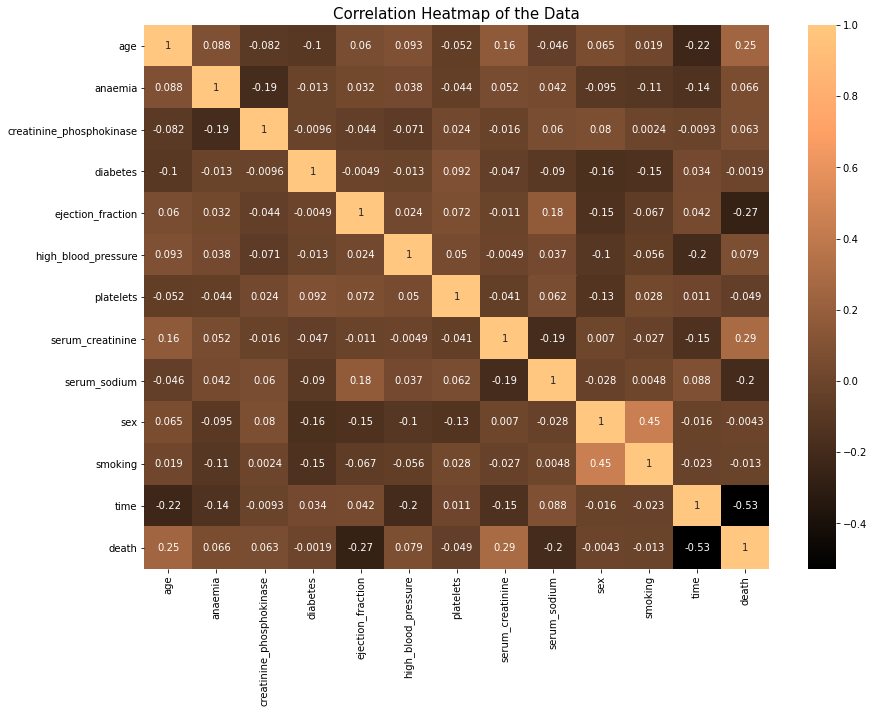

In [10]:
# lets check the Correlation Heat Map of the Data
plt.figure(figsize = (14, 10))

sns.heatmap(df.corr(), annot = True, cmap = 'copper')
plt.title('Correlation Heatmap of the Data', fontsize = 15)
plt.show()

Dari grafik di atas, kita dapat memilih **age**, **ejection_fraction**, **serum_creatinine**, **serum_sodium**, dan **time**  memiliki korelasi yang signifikan dengan **death**.

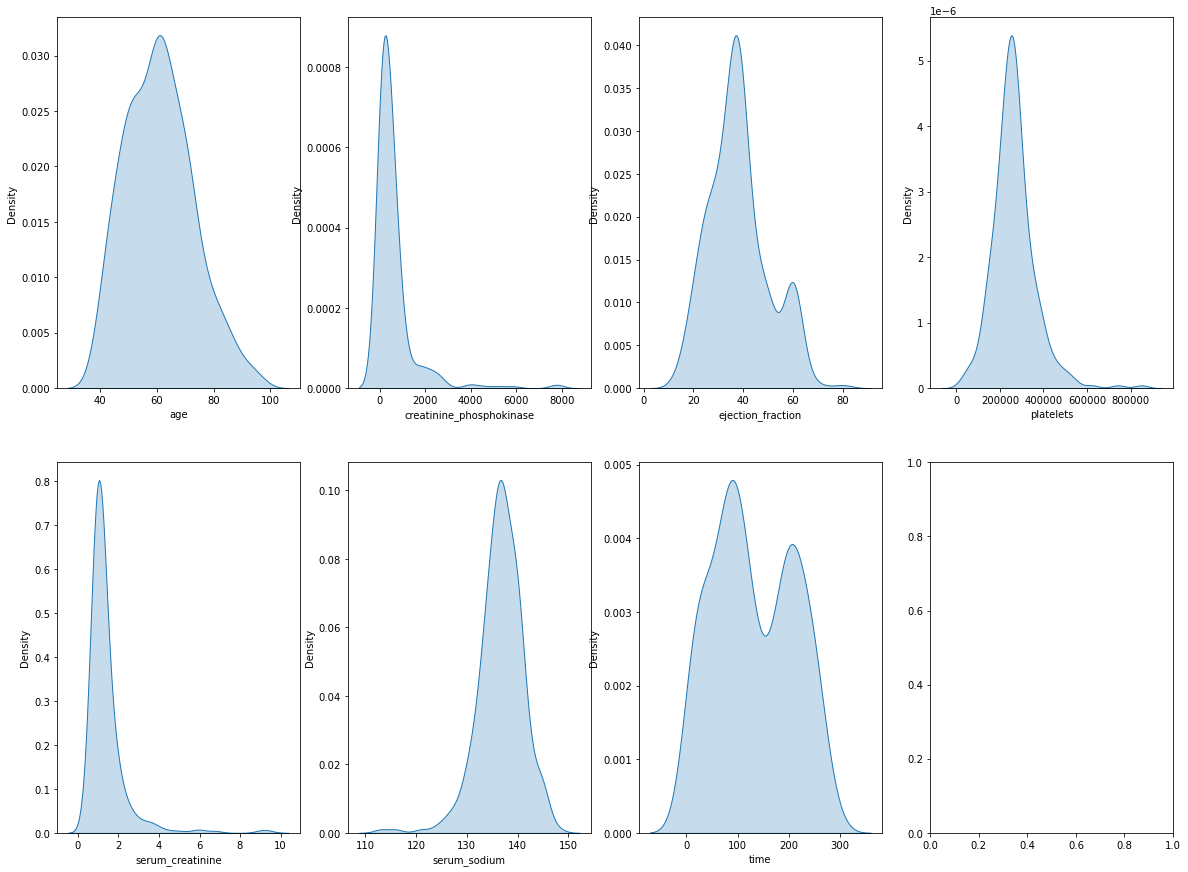

In [11]:
# Numerical Visualization
fig,axes = plt.subplots(nrows=2,ncols=4,figsize=(20,15))
i=0
j=0
for col in num.columns:
    sns.kdeplot(data=num,x=col,fill=True,ax=axes[i][j])
    j+=1
    if j>3:
        i+=1
        j=0
    if i==2:
        break

#### Plot distribusi data numerik
- Terdapat outlier pada kolom creatinine_phosphokinase, ejection fraction, platelets, serum_creatinine, dan serum_sodium
- Terdapat dua peak pada kolom ejection_fraction dan time
- Mayoritas kolom terdistribusi mendekati normal

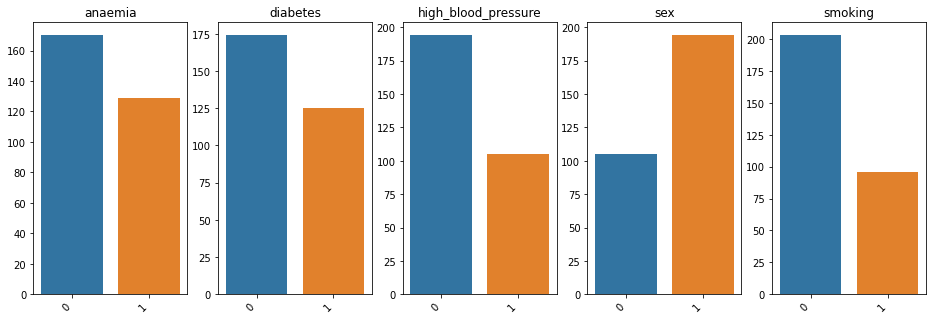

In [12]:
# Categorical Visualization
fig,axes=plt.subplots(ncols=5,figsize=(16,5))

for i,col in enumerate(cat.columns):
    sns.barplot(x=cat[col].value_counts().index, y=cat[col].value_counts().values, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].set_title(col)

#### Plot distribusi data kategorik
- Masing-masing kolom merupakan data binary
- Pasien yang bukan penderita anaemia lebih banyak daripada yang penderita
- Lebih banyak pasien yang bukan penderita diabetes
- Lebih banyak yang tidak memiliki hipertensi
- Lebih banyak pasien pria daripada wanita
- Lebih banyak pasien yang tidak merokok

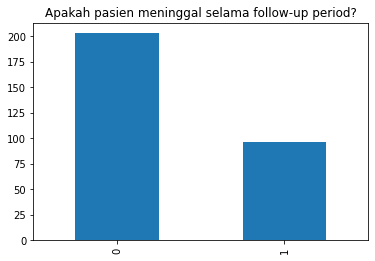

In [13]:
# Death
plt.title('Apakah pasien meninggal selama follow-up period?')
df.death.value_counts().plot(kind='bar')
plt.show()

In [ ]:
sns.countplot(x="age" , data=df.loc[(df["gender"]==0) & 
                                             (df["exang"]==1) &
                                             (df["target"]==1)]).set_title("Male category who are in high risk with Exercised induced Angina")

- Lebih banyak pasien yang tidak meninggal selama follow-up period. Apakah ada kaitan kematian pasien dengan jumlah hari follow-up?
- Ada imbalanced data target dengan perbedaan sekitar 50%. Perlu dilakukan imbalanced handling

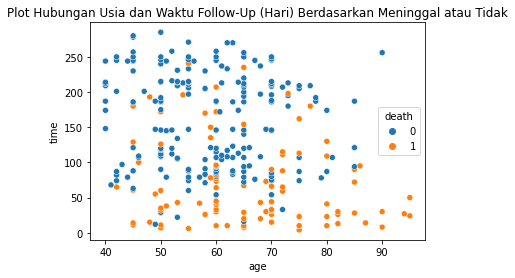

In [14]:
# Age, time & Death
plt.title('Plot Hubungan Usia dan Waktu Follow-Up (Hari) Berdasarkan Meninggal atau Tidak')
sns.scatterplot(data=df,x='age',y='time',hue='death')
plt.show()

Tidak terlihat adanya pemisah antara pasien yang meninggal dan tidak, baik berdasarkan follow-up period dan usia

##### Kesimpulan

- Lebih banyak pasien yang tidak meninggal selama follow-up period. Hal ini didukung oleh kebanyakan pasien tidak bermasalah dengan anaemia, diabetes, hipertensi yang mempengaruhi kinerja jantung, serta banyak pasien yang bukan perokok
- Ada imbalanced data target sehingga perlu dilakukan imbalanced handling

### Data Preprocessing

Pertama, kita akan melakukan pemilihan fitur dengan menggunakan SelectKBest, tetapi hal yang harus dilakukan pertama yaitu menormalisasikan dataset.

##### Normalize the dataset

In [16]:
# Standaridzed data menggunakan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)

df1 = pd.DataFrame(scaler.transform(df), 
                  index=df.index, columns=df.columns)
df1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0,0.946619,0.0
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0,0.950178,0.0
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0,0.975089,0.0
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0,0.982206,0.0


##### Select the best Feature

In [17]:
# Untuk memberi informasi tentang top fitur
a = df1.loc[:,df1.columns!='death']
b = df1[['death']]

# SelectKBest
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=5)
selector.fit(a, b)
a_new = selector.transform(a)
print(a.columns[selector.get_support(indices=True)])

Index(['age', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine',
       'time'],
      dtype='object')


Dapat disimpulkan bahwa top 5 fitur yang akan digunakan pada pelatihan model ialah:
- age
- ejection_fraction
- high_blood_pressure
- serum_creatinine
- time

In [22]:
# Buat tabel baru untuk top fitur
data = df1[['age', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine','time','death']]
data.head()

,age,ejection_fraction,high_blood_pressure,serum_creatinine,time,death
0,0.636364,0.090909,1.0,0.157303,0.000000,1.0
1,0.272727,0.363636,0.0,0.067416,0.007117,1.0
2,0.454545,0.090909,0.0,0.089888,0.010676,1.0
3,0.181818,0.090909,0.0,0.157303,0.010676,1.0
4,0.454545,0.090909,0.0,0.247191,0.014235,1.0


##### Scalling data

In [23]:
# Standaridzed data menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

#### Define X and y

In [24]:
# Mendefinisikan X dan y
X = data.drop(columns=['death'])
y = data['death']

##### Splitting data

In [25]:
# Mendefinisikan train, test pada X dan y
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Total of Training data : ", len(X_train))
print("Total of Testing data : ", len(X_test))

Total of Training data :  209
Total of Testing data :  90


### Modelling

Dalam analisis ini, kami menggunakan Random Forest Classifier sebagai model untuk melatih dataset.

Kemudian kami menggunakan algoritma boosting lainnya untuk meningkatkan akurasi hasil prediksi, seperti :
- AdaBoost
- Gradient Boosting
- XGBoost

In [29]:
# Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve

#### Random Forest Classifier

confusion matrix
[[59  3]
 [ 9 19]]


              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91        62
         1.0       0.86      0.68      0.76        28

    accuracy                           0.87        90
   macro avg       0.87      0.82      0.83        90
weighted avg       0.87      0.87      0.86        90

AUC Score :  0.8150921658986175


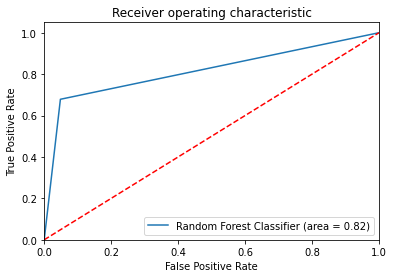

0.76


In [31]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42, max_leaf_nodes=16, max_depth=5)
rfc.fit(X_train,y_train)

#Predict
pred_rfc = rfc.predict(X_test)

#Accuracy
score_rfc = accuracy_score(y_test,pred_rfc)

# Confusion Matrix
rfc_conf_matrix = confusion_matrix(y_test, pred_rfc)
print("confusion matrix")
print(rfc_conf_matrix)
print("\n")
print(classification_report(y_test,pred_rfc))

#ROC Curve
rfc_roc = roc_auc_score(y_test, pred_rfc)
print("AUC Score : ", rfc_roc)
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_rfc)
plt.figure()
plt.plot(fpr1, tpr1, label='Random Forest Classifier (area = %0.2f)' % rfc_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import f1_score
print(f1_score(y_test, pred_rfc))

Dari hasil diatas dapat dikatakan sebagai berikut:

Random Forest Classifier memiliki kemampuan tinggi untuk menghasilkan **tidak meninggal** dengan nilai Precision 0.87 , nilai Recall 0.95 dan nilai F1-Score 0.91 (hampir sempurna).

Tetapi memiliki kemampuan yang sedang untuk menghasilkan **meninggal** dengan nilai Precision 0,86, nilai Recall 0,68, nilai F1-Score 0,76

Jadi, Random Forest Classifier memiliki akurasi yang cukup baik yaitu 0,87 dan probabilitas yang tinggi untuk menghasilkan matriks kebingungan dari masing-masing treshold yang hanya 0,82

#### Random Forest Classifier + AdaBoost Classifier

confusion matrix
[[59  3]
 [ 8 20]]


              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91        62
         1.0       0.87      0.71      0.78        28

    accuracy                           0.88        90
   macro avg       0.88      0.83      0.85        90
weighted avg       0.88      0.88      0.87        90

AUC Score :  0.8329493087557605


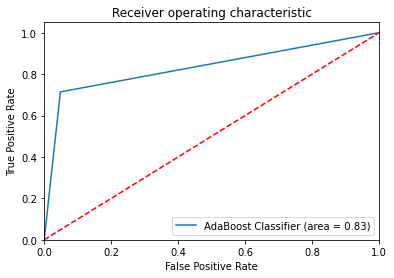

0.7843137254901961


In [32]:
# Random Forest Classifier + AdaBoost Classifier
ada = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=5,
                                                                             max_leaf_nodes=16,
                                                                             n_estimators=100,
                                                                             random_state=42),
                                       
                                       n_estimators=200,
                                       learning_rate=0.1,
                                       algorithm='SAMME.R',
                                       random_state=42)
ada.fit(X_train,y_train)

#Predict
pred_ada = ada.predict(X_test)

#Accuracy
score_ada = accuracy_score(y_test,pred_ada)

# Confusion Matrix
ada_conf_matrix = confusion_matrix(y_test, pred_ada)
print("confusion matrix")
print(ada_conf_matrix)
print("\n")
print(classification_report(y_test,pred_ada))

#ROC Curve
ada_roc = roc_auc_score(y_test, pred_ada)
print("AUC Score : ", ada_roc)
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_ada)
plt.figure()
plt.plot(fpr1, tpr1, label='AdaBoost Classifier (area = %0.2f)' % ada_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

from sklearn.metrics import f1_score
print(f1_score(y_test, pred_ada))

Dari hasil diatas dapat dikatakan sebagai berikut:

Setelah dilakukannya AdaBoost Classifier memiliki kemampuan tinggi untuk menghasilkan **tidak meninggal** dengan nilai Precision 0.88 , nilai Recall 0.95 dan nilai F1-Score 0.91 (hampir sempurna).

Tetapi memiliki kemampuan yang tinggi untuk menghasilkan **meninggal** dengan nilai Precision 0,87, nilai Recall 0,71, nilai F1-Score 0,78

Jadi, Random Forest Classifier yang sudah dilakukan AdaBoost mengalami pengingkatan di akurasi yang tidak terlalu signifikan yaitu 0,88 dan probabilitas yang tinggi untuk menghasilkan matriks kebingungan dari masing-masing treshold yang hanya 0,83

confusion matrix
[[57  5]
 [ 7 21]]


              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90        62
         1.0       0.81      0.75      0.78        28

    accuracy                           0.87        90
   macro avg       0.85      0.83      0.84        90
weighted avg       0.86      0.87      0.87        90

AUC Score :  0.8346774193548387


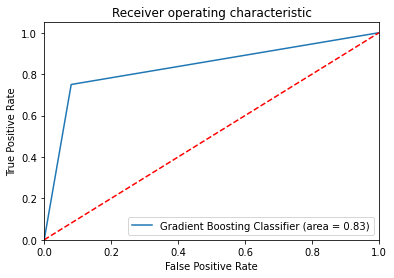

0.7777777777777779


In [33]:
# Define Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

#Predict
pred_gb = gb.predict(X_test)

#Accuracy
score_gb = accuracy_score(y_test,pred_gb)

# Confusion Matrix
gb_conf_matrix = confusion_matrix(y_test, pred_gb)
print("confusion matrix")
print(gb_conf_matrix)
print("\n")
print(classification_report(y_test,pred_gb))

#ROC Curve
gb_roc = roc_auc_score(y_test, pred_gb)
print("AUC Score : ", gb_roc)
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_gb)
plt.figure()
plt.plot(fpr1, tpr1, label='Gradient Boosting Classifier (area = %0.2f)' % gb_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

from sklearn.metrics import f1_score
print(f1_score(y_test, pred_gb))

Dari hasil diatas dapat dikatakan sebagai berikut:

Gradient Boosting Classifier memiliki kemampuan tinggi untuk menghasilkan **tidak meninggal** dengan nilai Precision 0.89 , nilai Recall 0.92 dan nilai F1-Score 0.90 (hampir sempurna).

Tetapi memiliki kemampuan yang sedang untuk menghasilkan **meninggal** dengan nilai Precision 0,81, nilai Recall 0,75, nilai F1-Score 0,78

Jadi, Gradient Boosting Classifier memiliki akurasi yang cukup baik yaitu 0,87 dan probabilitas yang tinggi untuk menghasilkan matriks kebingungan dari masing-masing treshold yang hanya 0,83

#### XGBoost

[23:10:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix
[[57  5]
 [ 7 21]]


              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90        62
         1.0       0.81      0.75      0.78        28

    accuracy                           0.87        90
   macro avg       0.85      0.83      0.84        90
weighted avg       0.86      0.87      0.87        90

AUC Score :  0.8346774193548387


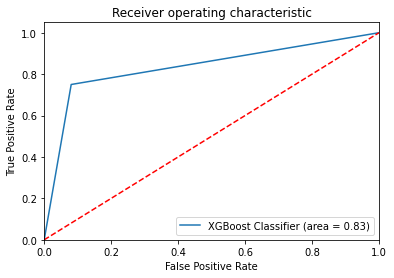

0.7777777777777779


In [34]:
# XGBoost
xgb = xgb.XGBClassifier(max_depth=5, n_estimators=1000, learning_rate=0.3, n_jobs=-1)
xgb.fit(X_train, y_train)

#Predict
pred_xgb = xgb.predict(X_test)

#Accuracy
score_xgb = accuracy_score(y_test,pred_xgb)

# Confusion Matrix
xgb_conf_matrix = confusion_matrix(y_test, pred_xgb)
print("confusion matrix")
print(xgb_conf_matrix)
print("\n")
print(classification_report(y_test,pred_xgb))

#ROC Curve
xgb_roc = roc_auc_score(y_test, pred_xgb)
print("AUC Score : ", xgb_roc)
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_xgb)
plt.figure()
plt.plot(fpr1, tpr1, label='XGBoost Classifier (area = %0.2f)' % xgb_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

from sklearn.metrics import f1_score
print(f1_score(y_test, pred_xgb))

Dari hasil diatas dapat dikatakan sebagai berikut:

XGBoost Classifier memiliki kemampuan tinggi untuk menghasilkan **tidak meninggal** dengan nilai Precision 0.89 , nilai Recall 0.92 dan nilai F1-Score 0.90 (hampir sempurna).

Tetapi memiliki kemampuan yang sedang untuk menghasilkan **meninggal** dengan nilai Precision 0,81, nilai Recall 0,75, nilai F1-Score 0,78

Jadi, XGBoost Classifier memiliki akurasi yang cukup baik yaitu 0,87 dan probabilitas yang tinggi untuk menghasilkan matriks kebingungan dari masing-masing treshold yang hanya 0,83

### Accuracy Model

In [36]:
model = pd.DataFrame({'Model': ['Random Forest','Random Forest + AdaBoost','Gradient Boost','XGBoost'], 
                         'Accuracy (%)': [score_rfc*100, score_ada*100, score_gb*100, score_xgb*100]})
model

,Model,Accuracy (%)
0,Random Forest,86.666667
1,Random Forest + AdaBoost,87.777778
2,Gradient Boost,86.666667
3,XGBoost,86.666667


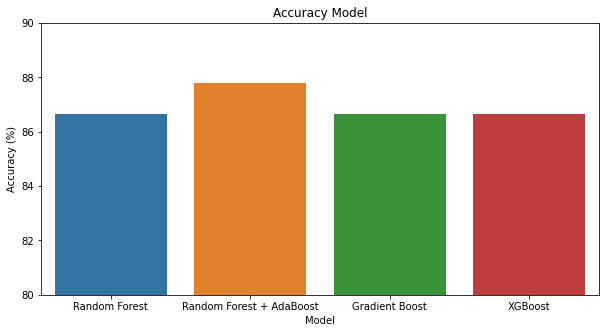

In [37]:
# Showing the bar chart
plt.figure(figsize=(10,5))
plt.title('Accuracy Model')
sns.barplot(data=model, x='Model', y='Accuracy (%)')
plt.ylim(80,90)
plt.show()

Setelah dilakukan penggabungan untuk dilihat accuracy model mana yang paling tinggi, dapat dilihat dari bar plot diatas bahwa **RandomForest + AdaBoost** yang mencapai akurasi terbaik dalam memprediksi ***death***.

### Model Inference

In [41]:
df_new = df[['age', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine','time','death']]
df_new.head()

,age,ejection_fraction,high_blood_pressure,serum_creatinine,time,death
0,75.0,20,1,1.9,4,1
1,55.0,38,0,1.1,6,1
2,65.0,20,0,1.3,7,1
3,50.0,20,0,1.9,7,1
4,65.0,20,0,2.7,8,1


In [42]:
# New data 
new_data = [[54.0, 35, 1, 1.4, 6]]

#Predict 
predict = ada.predict(new_data)

print("Hasil Klasifikasi model Random Forest + AdaBoost : \n")
print('Death {}'.format(predict))

Hasil Klasifikasi model Random Forest + AdaBoost : 

Death [0.]


### Kesimpulan

- Lebih banyak pasien yang tidak meninggal selama follow-up period. Hal ini didukung oleh kebanyakan pasien tidak bermasalah dengan anaemia, diabetes, hipertensi yang mempengaruhi kinerja jantung, serta banyak pasien yang bukan perokok

- Setelah dilakukan penggabungan untuk dilihat accuracy model mana yang paling tinggi, dapat dilihat dari bar plot diatas bahwa **RandomForest + AdaBoost** yang mencapai akurasi terbaik dalam memprediksi ***death***.